## Introduction
Before we talk about how to use numpy with image files, let's first discuss how computers handle images. 

Numpy by itself can't open a .png or .jpeg file. Instead we need to use it in conjuction with a package called `pillow` - which stands for python imaging library. 

In [1]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# this Image function allows us to open an image
# it allows us to transform an image into an array that numpy can understand.
from PIL import Image

In [5]:
pic = Image.open('/Users/Shravan/R/projects/ComputerVision/images/lenna.png')

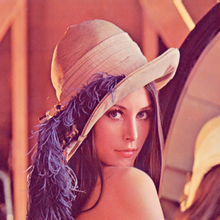

In [6]:
pic

In [7]:
# lets check what type of object it is
type(pic)

PIL.PngImagePlugin.PngImageFile

**Numpy can't deal with PngImageFile type** . So we need to transform this into an numpy array!

In [8]:
pic_arr = np.asarray(pic)

In [10]:
# now check the type of the object
type(pic_arr)

numpy.ndarray

In [11]:
pic_arr.shape

(220, 220, 3)

Shape tells us that the pic is a 220 x 220 image with 3 color channels.

### Use of plt.imshow()
Allows us to view an array as an image. This is a special function which is designed to show images stored in arrays. Typically created from `asarray` function.

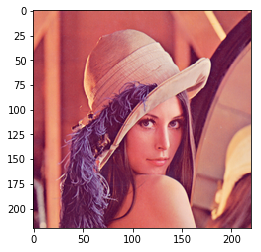

In [13]:
# allows us to show the array as an image.
plt.imshow(pic_arr)

### Image channels
A key thing to understand here is that the above image actually has 3 color channels. Let's try to extract these channels individually. 

Here's what we will do:
- We will zero out the contribution from Green and Blue channels to get the Red channel.

In [14]:
# lets first make a copy of pic_arr
pic_red = pic_arr.copy()

In [16]:
# shape shows us that there are 3 channels right now.
pic_red.shape

(220, 220, 3)

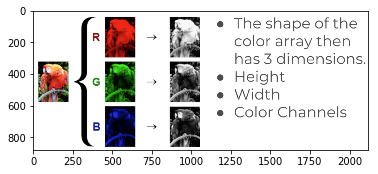

In [18]:
# This code is just to display the screenshot that I took to illustrate the idea of color channels
colorChannels = Image.open('images/colorChannels.png')
colorChannelsArr =  np.asarray(colorChannels)
plt.imshow(colorChannelsArr)

As we can see, there are 3 channels for the color image. 

### How do we zero out these channels ?

A key thing to understand with the `(220, 220, 3)` shape is that, it has 3 arrays. The way this array is formatted is that, it has the `Red` channel first, `Green` channel next, and `Blue` channel, in that order.

In [20]:
# so to extract the Red channel data
pic_red[:, :, 0]

array([[225, 224, 227, ..., 227, 232, 213],
       [225, 224, 227, ..., 230, 238, 219],
       [227, 224, 228, ..., 209, 189, 149],
       ...,
       [ 90,  95,  97, ..., 126, 148, 158],
       [ 87,  92,  95, ..., 143, 167, 169],
       [ 84,  95,  93, ..., 159, 176, 182]], dtype=uint8)

### The concept of color scale ?
Why does the image appear to be **GREEN** ? This is because, matplotlib by default will show the gray scale images with a `veridis` color scale. 

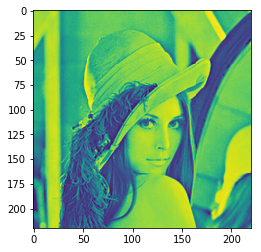

In [23]:
# When we applied imshow on this, it applied the veridis color scale
plt.imshow(pic_red[:, :, 0])

However, this is not an accurate representation of what this **RED** array represents. In fact, it would be more accurate if we would say `cmap = gray`.

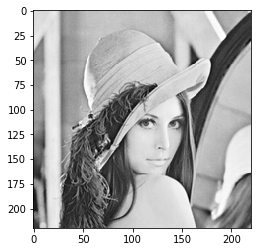

In [24]:
# Displaying the gray scale image of Red channel
plt.imshow(pic_red[:, :, 0], cmap='gray')

> The above picture we are showing is actually the **RED** channel values. They are all between 0-255. Remember, that our image has 2 more of these, one for Green and Blue channels. 

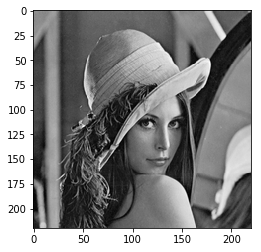

In [25]:
# Displaying the gray scale image of Green channel
plt.imshow(pic_red[:, :, 1], cmap='gray')

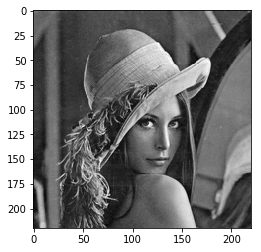

In [26]:
# Displaying the gray scale image of Blue channel
plt.imshow(pic_red[:, :, 2], cmap='gray')

> You will notice that all 3 images are slightly different. For example, consider the Red Channel. The value 0-255 here should be interpreted as 255 - full red color (or pure white), 0 - no red color (or pure black). 

> As "Lenna" is more red, you will notice that the red channel image is more white.

### Coming back to making the Green and Blue channels to zero.

In [27]:
# Set the Green channel to 0's
pic_red[:, :, 1] = 0

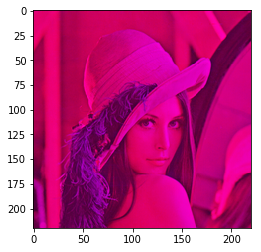

In [28]:
# Now let's see how our image looks like after removing the Green channel.
plt.imshow(pic_red)

> Right now, the image has "Red" and "Blue" channels in it. That's why it looks a little purple. Next, let's remove the Blue channel.

In [29]:
# Set the Blue channel to 0's
pic_red[:, :, 2] = 0

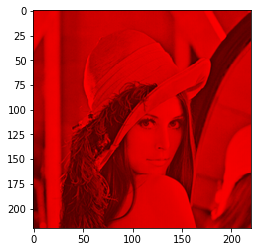

In [30]:
# Now let's see how our image looks like after removing the Green and Blue channels.
plt.imshow(pic_red)

> Something to keep in mind now, is that the shape of this *pic_red* array still contains 3 channels, it is just that the 2 channels contain zeros.

# Using OpenCV

Image Basics with openCV - In this section we will begin building an understanding of how to use the OpenCV library. Specifically:
- How to open images ?
- How to draw on them ?

OpenCV (Open Source Computer Vision) is a library of functions mainly aimed at real-time computer vision.

> Key features of OpenCV library:
    - It contains many popular algorithms for computer vision like:
        - Object detection
        - Tracking algorithms

In [31]:
import cv2